### Logistic Regression 

The output is a probability that the given input point belongs to a certain class. For simplicity, lets assume that we have only two classes(for multiclass problems, you can look at Multinomial Logistic Regression), and the probability in question is $P_+ ->$ the probability that a certain data point belongs to the ‘+‘ class. Offcourse, $P_- = 1 - P_+.$ Thus, the output of Logistic Regression always lies in [0, 1].

Central premise of Logistic Regression is the assumption that your input space can be separated into regions by a linear boundary. This dividing plane is called a linear discriminant (linear + helps the model ‘discriminate’ between points belonging to different classes)

The geometric implication of this ‘division’ of the input space into 2 distinct regions --> Assuming 2 input variables for simplicity $x_1$ and $x_2$, the function corresponding to the boundary will be something like:

$\beta_0 + \beta_1 x_1 + \beta_2 x_2.$

$x_1$ and $x_2$ are BOTH input variables, and the output variable isn’t a part of the conceptual space- unlike a technique like linear regression.

Consider a point $(a, b)$. Plugging the values of  $x_1$ and $x_2$ into the boundary function, we will get its output $\beta_0 + \beta_1 a + \beta_2$ b. Now depending on the location of $(a, b)$, there are three possibilities to consider: 

-I. $(a, b)$ lies in the region defined by points of the + class. As a result, $\beta_0 + \beta_1 a + \beta_2 b$ will be positive, lying somewhere in $(0, \infty)$. Mathematically, the higher the magnitude of this value, the greater is the distance between the point and the boundary. Intuitively speaking, the greater is the probability that $(a, b)$ belongs to the + class. Therefore, $P_+$ will lie in (0.5, 1].

-2. $(a, b)$ lies in the region defined by points of the - class. Now, $\beta_0 + \beta_1 a + \beta_2 b$ will be negative, lying in $(-\infty, 0)$. But like in the positive case, higher the absolute value of the function output, greater the probability that $(a, b)$ belongs to the - class. $P_+$ will now lie in [0, 0.5).

-3 $(a, b)$ lies ON the linear boundary. In this case, $\beta_0 + \beta_1 a + \beta_2 b = 0$. This means that the model cannot really say whether $(a, b)$ belongs to the + or - class. As a result, P_+ will be exactly 0.5.

We have a function that outputs a value in $(-\infty, \infty)$ given an input data point. But how do we map this to the probability P_+, that goes from [0, 1]? The answer, is in the **Sigmoid** function

Logistic regression: log-odds of a categorical response being "classx" is modeled as a linear combination of the features:

$log(p1−p)=β0+β1x$

This is called the logit function.

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys
sys.path.insert(0, 'helper_functions/')

from sklearn.preprocessing import StandardScaler

# helper functions
import data_manipulation as dm
import ml_ops as mo
from activation_functions import Sigmoid
import ml_visuals as mlvis

# load data
iris = datasets.load_iris()

In [2]:
# preprocessing , train, test split
X = pd.DataFrame(iris.data, columns = iris.feature_names).iloc[:,[2,3]].values
y = iris.target

# normalize with dm.normalize(X), standardize with dm.standardize(X)
X = dm.standardize(X)
X_train, X_test, y_train, y_test = dm.train_test_split(X, y,shuffle=True, 
                                                    test_size=0.33, seed=1)

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [4]:
accuracy = mo.mean_squared_error(y_test, y_pred)
print ('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [5]:
score = lr.score(X_test, y_test)

In [6]:
score

0.9387755102040817

In [5]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

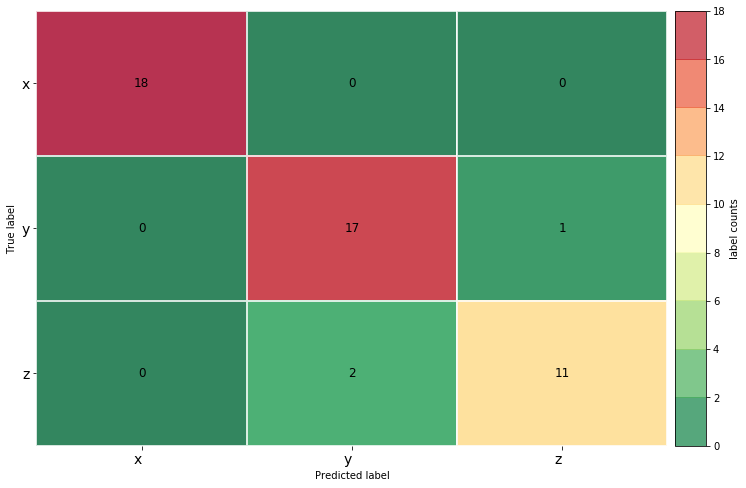

In [6]:
# helper_functions/ml_visuals/pprint_confusion_matrix
from ml_visuals import pprint_confusion_matrix
_ = pprint_confusion_matrix(mat, class_names=['x', 'y', 'z'], figsize=[12,8])

### Sklearn wrapper

example: standardization, fitting and plotting* (*plot_decision_regiosn from the Sebastian Raschka's ecellent PML book chapter 3)

In [10]:
from importlib import reload
reload(mlvis)

<module 'ml_visuals' from 'helper_functions/ml_visuals.py'>

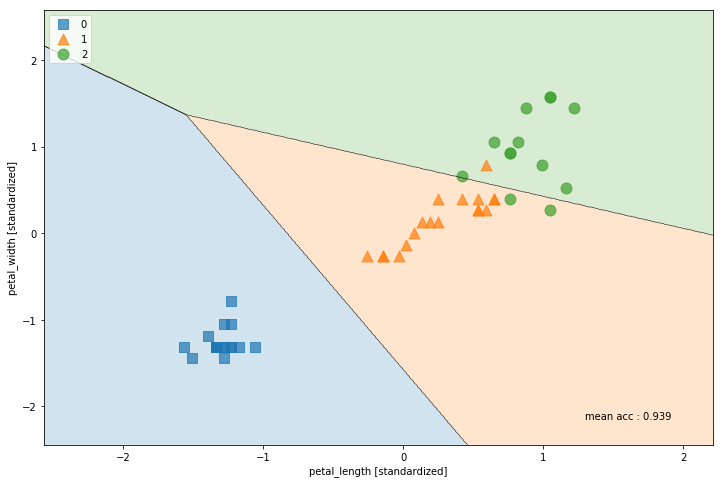

In [11]:
from ml_visuals import plot_decision_boundaries

scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

fig, ax = plt.subplots(figsize=[12,8])
plot_decision_boundaries(X_test, y_test, classifier=lr, scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs, scatter_highlight_kwargs=scatter_highlight_kwargs, ax=ax)
plt.xlabel('petal_length [standardized]')
plt.ylabel('petal_width [standardized]')
_ = plt.legend(loc= 'upper left')

In [12]:
# Initializing Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = SVC()

/home/diederik/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


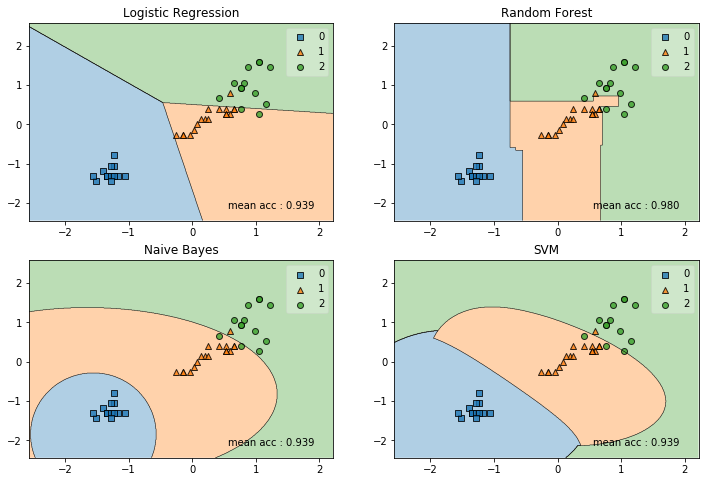

In [14]:
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig, ax = plt.subplots(figsize=[12,8])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_boundaries(X=X_test, y=y_test, classifier=clf, ax=ax)
    plt.title(lab)

plt.show()